**Hypoxia SHAP Explainability**

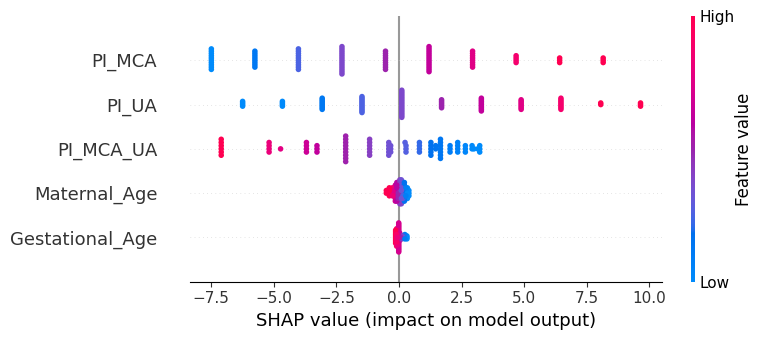

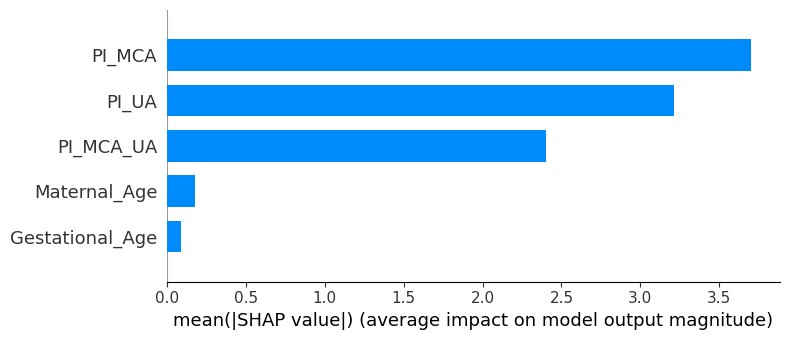

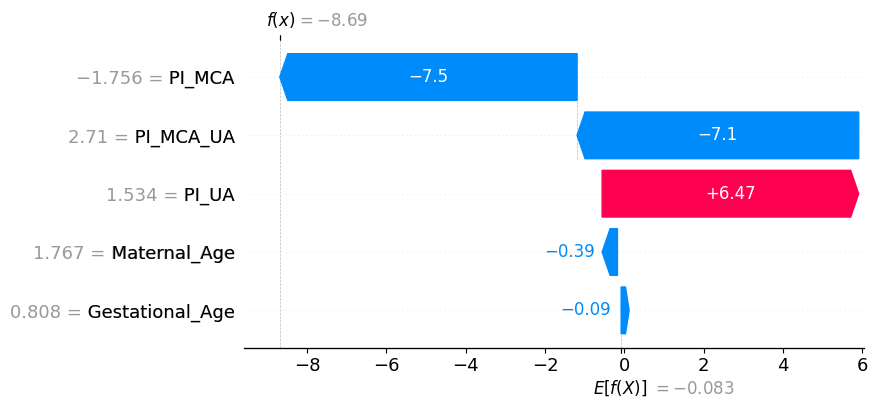

In [3]:
# Logistic Regression + SHAP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import shap
shap.initjs()

# ---------------------------------
# 1. Load dataset
# ---------------------------------
df = pd.read_excel("Overall_dataset_noninvasive.xlsx")
df.columns = [c.strip() for c in df.columns]

# ---------------------------------
# 2. Select final 5 features + label
#    (Same features used in main project)
# ---------------------------------
FEATURES = ["Gestational_Age", "Maternal_Age", "PI_MCA", "PI_UA", "PI_MCA_UA"]

X = df[FEATURES].copy()

# Convert label to numeric (Normal=0, IUGR=1)
y = df["Status"].astype(str).str.strip().str.upper().map({"NORMAL":0, "IUGR":1})

# ---------------------------------
# 3. Train-test split + scaling
# ---------------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_raw), columns=X_train_raw.columns)
X_test  = pd.DataFrame(scaler.transform(X_test_raw), columns=X_test_raw.columns)

# ---------------------------------
# 4. Logistic Regression model
# ---------------------------------
logreg = LogisticRegression(max_iter=2000, class_weight="balanced")
logreg.fit(X_train, y_train)

# ---------------------------------
# 5. SHAP Explainability
# ---------------------------------
explainer = shap.Explainer(logreg, X_train)
shap_values = explainer(X_test)

# ---------------------------------
# 6. SHAP Summary - Beeswarm
# ---------------------------------
plt.figure(figsize=(8,5))
shap.summary_plot(shap_values, X_test)
plt.show()

# ---------------------------------
# 7. SHAP Summary - Bar Plot
# ---------------------------------
plt.figure(figsize=(8,5))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# ---------------------------------
# 8. SHAP Waterfall Plot for one sample
# ---------------------------------
idx = X_test.index[0]   # first sample
pos = list(X_test.index).index(idx)

ex = shap.Explanation(
    values=shap_values.values[pos],
    base_values=shap_values.base_values[pos],
    data=X_test.loc[idx],
    feature_names=X_test.columns
)

shap.waterfall_plot(ex)
